<a href="https://colab.research.google.com/github/mamuncseru/tensorflow_zero_to_mastery/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

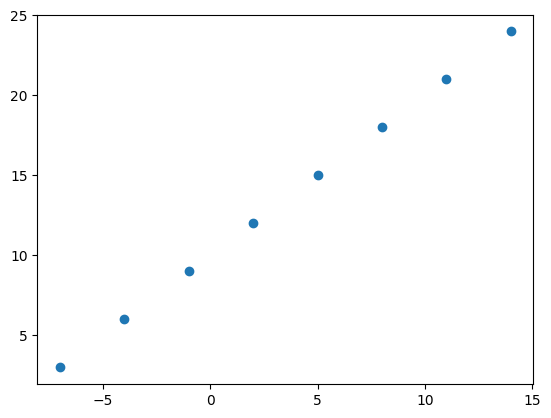

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[1], y[1]

(-4.0, 6.0)

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [11]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [20]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

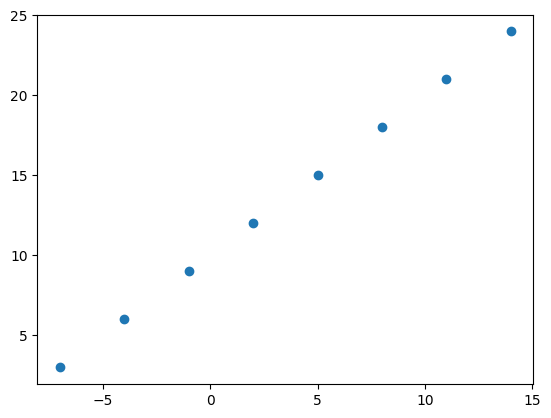

In [15]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model -letting the model try to find patterns between X & y (features and labels)

In [21]:
# set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for Stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 323ms/step - loss: 17.5098 - mae: 17.5098
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 17.2285 - mae: 17.2285
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 16.9473 - mae: 16.9473
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 16.6660 - mae: 16.6660
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 16.3848 - mae: 16.3848


In [22]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 56ms/step


array([[-10.91258]], dtype=float32)

In [26]:
y_pred + 16

array([[5.0874205]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (also called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [30]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 10.6374 - mae: 10.6374
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5049 - mae: 10.5049
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.3724 - mae: 10.3724
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2399 - mae: 10.2399
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1074 - mae: 10.1074
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9749 - mae: 9.9749
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 9.8424 - mae: 9.8424
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7099 - mae: 9.7099
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5774 - mae: 9.5774
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4449 - mae: 9.4449
Epoch 11/100
1/1 [==============================] - 0s 21ms/s

In [32]:
# Remind ourselves of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's see if our model's prediction has improved ...
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 31ms/step


array([[30.18888]], dtype=float32)

In [34]:
# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 920ms/step - loss: 13.6282 - mae: 13.6282
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3389 - mae: 13.3389
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0310 - mae: 13.0310
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7389 - mae: 12.7389
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4482 - mae: 12.4482
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.1391 - mae: 12.1391
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8039 - mae: 11.8039
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4238 - mae: 11.4238
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9899 - mae: 10.9899
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4790 - mae: 10.4790
Epoch 11/100
1/1 [==============================] - 

In [35]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 61ms/step


array([[32.232002]], dtype=float32)

In [36]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.7613 - mae: 13.7613
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3995 - mae: 13.3995
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 13.0587 - mae: 13.0587
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7472 - mae: 12.7472
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4497 - mae: 12.4497
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1488 - mae: 12.1488
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8443 - mae: 11.8443
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5351 - mae: 11.5351
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2220 - mae: 11.2220
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8965 - mae: 10.8965
Epoch 11/100
1/1 [==============================] - 0

In [37]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 324ms/step


array([[32.23548]], dtype=float32)

In [41]:
 # 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(100, activation='relu'),
     tf.keras.layers.Dense(1)
     ])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 13.4357 - mae: 13.4357
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 13.0238 - mae: 13.0238
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 12.6418 - mae: 12.6418
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 12.2763 - mae: 12.2763
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 11.9152 - mae: 11.9152
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 11.5825 - mae: 11.5825
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 11.2541 - mae: 11.2541
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 10.9356 - mae: 10.9356
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 10.6035 - mae: 10.6035
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 10.2468 - mae: 10.2468
Epoch 11/200
1/1 [==============================] - 0

In [42]:
# let's predict our model output
model.predict(tf.constant([17.0]))

1/1 [==============================] - 0s 76ms/step


array([[26.88557]], dtype=float32)